<a href="https://colab.research.google.com/github/edburdett/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# Replicate the lesson code

In [0]:
# The usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Set plot style
plt.style.use('fast')

In [171]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [172]:
# Change cabin class from 1, 2, 3 to 'first', 'second', 'third'
df['cabin_class'] = df["Pclass"].map({1:'first', 2:'second', 3:'third'})
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


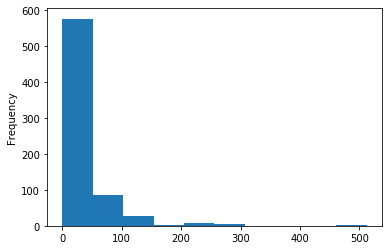

In [173]:
# Plot histogram for 'Fare'
df['Fare'].plot(kind='hist');

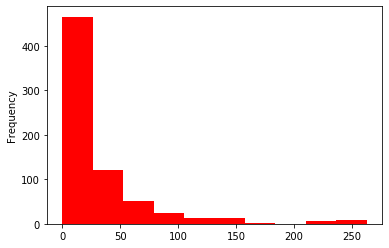

In [174]:
# Remove outliers
df = df[df['Fare'] < 500]
df['Fare'].plot(kind='hist', color='red');

In [0]:
# Divide 'Fare' into bins
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'very high']
df['Fare groups'] = pd.cut(df['Fare'], 
                           bins=farebins,
                           labels=farelabels)

In [176]:
# Examine 'Fare groups' with value_counts, save as myresultsmy
myresults = df['Fare groups'].value_counts().sort_index()
myresults

low          154
medium       189
high         185
very high    174
Name: Fare groups, dtype: int64

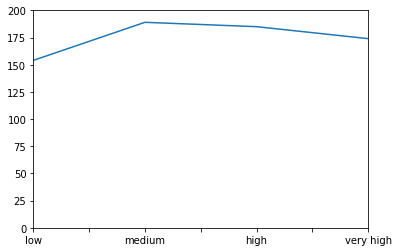

In [177]:
# Plot myresults, adjust ylim so graph starts at 0
myresults.plot(ylim=(0, 200))

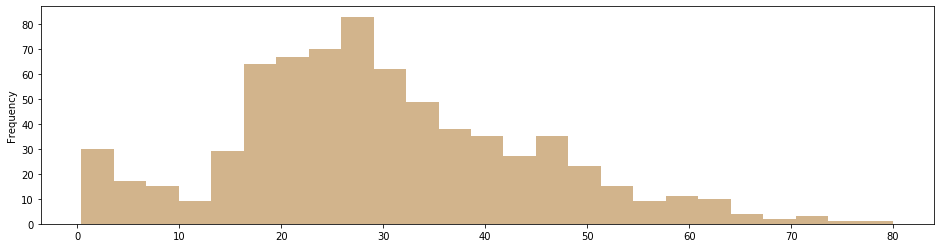

In [178]:
# Plot age, redefining bins and figsize
df['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='tan');

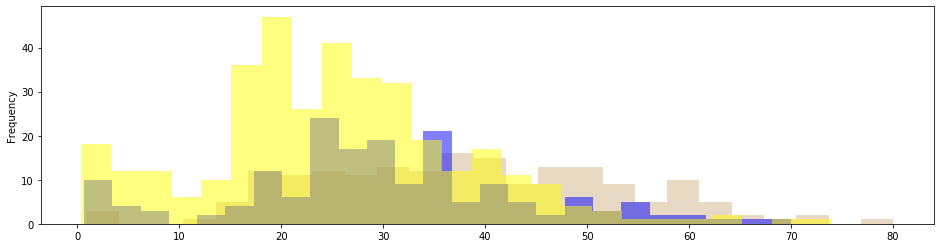

In [179]:
# Stacked Histogram of continuous variable, broken out by categorical variable
df[df['cabin_class'] == 'first']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan', alpha=0.5)
df[df['cabin_class'] == 'second']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='blue', alpha=0.5)
df[df['cabin_class'] == 'third']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='yellow', alpha=0.5);

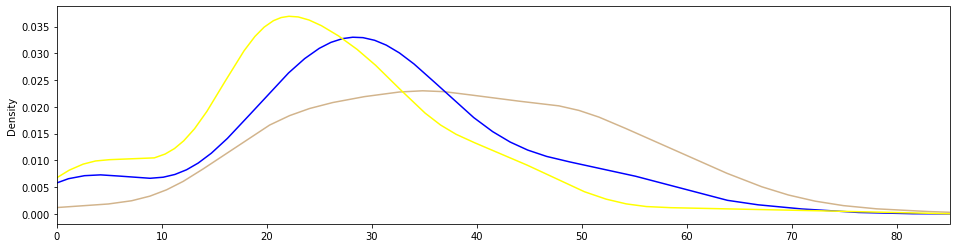

In [180]:
# Plot same with KDE, use xlim to limit plot to values that make sense
df[df['cabin_class'] == 'first']['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='tan')
df[df['cabin_class'] == 'second']['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='blue')
df[df['cabin_class'] == 'third']['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='yellow');

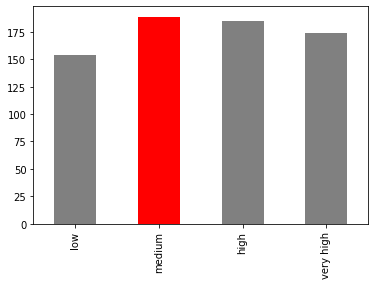

In [181]:
# Bar chart with single categorical variable
myresults = df['Fare groups'].value_counts().sort_index()
myresults.plot(kind='bar', color=['gray', 'red', 'gray', 'gray']);

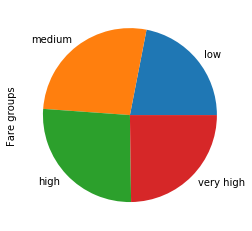

In [182]:
# Pie chart (rarely a good idea)
myresults.plot(kind='pie');

In [183]:
# Use crosstabs to compare two categorical variables
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


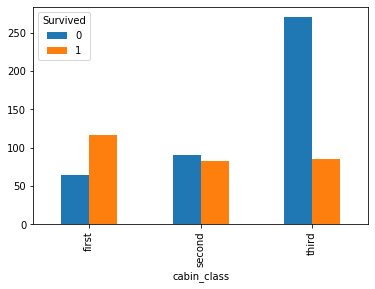

In [184]:
# Bar chart of crosstab
cab_death.plot(kind='bar');

In [185]:
# Crosstab with column percents
cab_death1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


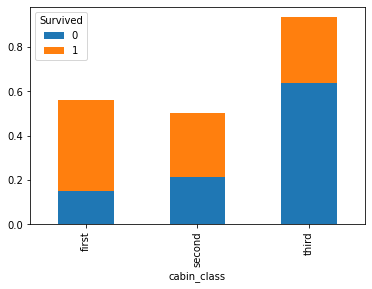

In [186]:
# Stacked bar chart of crosstab
cab_death1.plot(kind='bar', stacked=True);

In [187]:
# Cross tab with row percents
cab_death2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


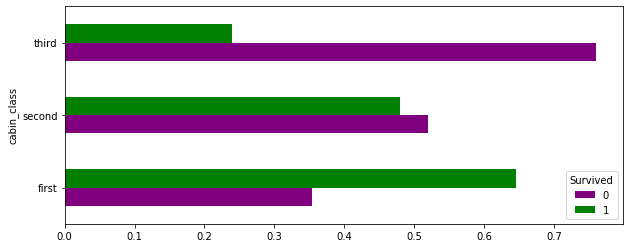

In [188]:
# Horizontal bar chart
cab_death2.plot(kind='barh', figsize=(10, 4), color=['purple', 'green']);

In [189]:
# Single continuous variable
df['Age'].mean()

29.618011283497882

In [190]:
# Continuous variable broke out by categorical variable
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

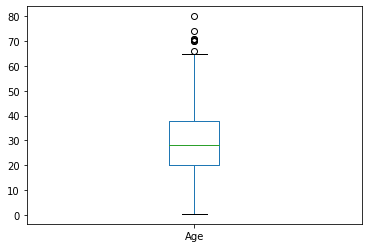

In [191]:
# Boxplot of single continuous variable

df['Age'].plot(kind='box');

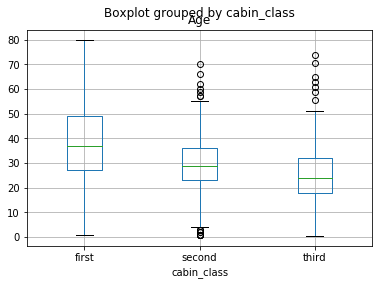

In [192]:
# Break out continous variable by categorical
df.boxplot(column='Age', by='cabin_class')

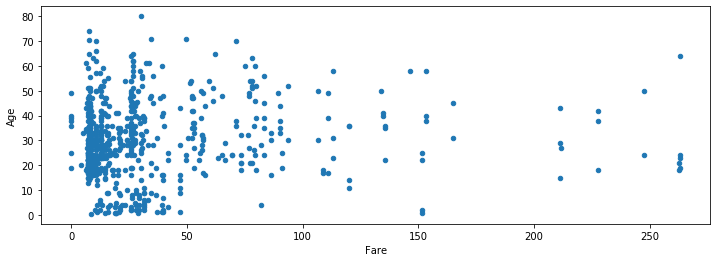

In [193]:
# Compare two continous variables
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

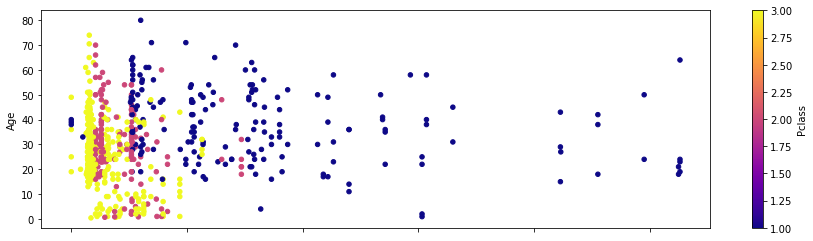

In [194]:
# Scatterplot with Three variables
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', figsize=(15, 4), colormap='plasma');

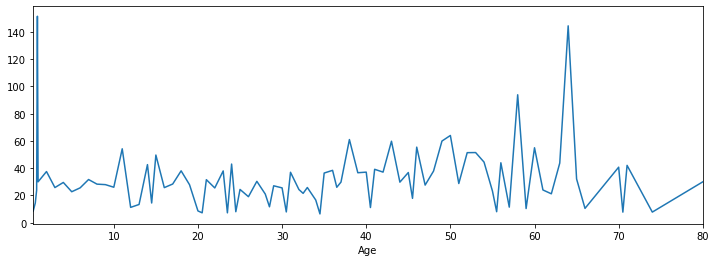

In [195]:
# Line chart to examine two continous variables
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

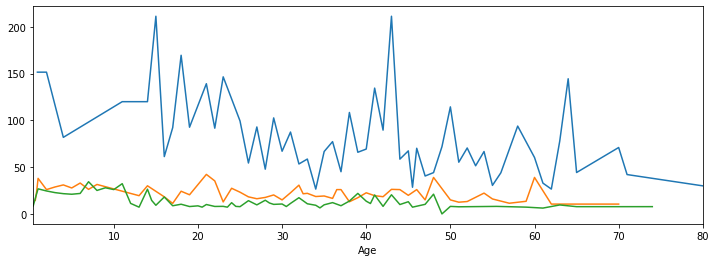

In [196]:
# Line chart - age by fare and cabin class
df[df['cabin_class']=='first'].groupby('Age')['Fare'].mean().plot(figsize=(12,4))
df[df['cabin_class']=='second'].groupby('Age')['Fare'].mean().plot(figsize=(12,4))
df[df['cabin_class']=='third'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));


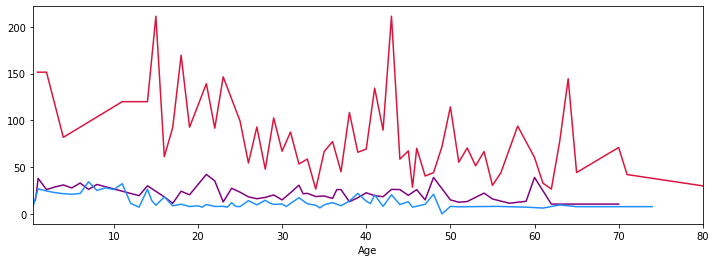

In [197]:
# Do the same with a list
mycolors = ['crimson', 'purple', 'dodgerblue']
cab_classes = ['first', 'second', 'third']

for x in [0, 1, 2]:
  df[df['cabin_class']==cab_classes[x]].groupby('Age')['Fare'].mean().plot(figsize=(12, 4), color=mycolors[x]);

In [198]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


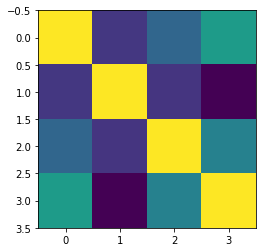

In [199]:
# Image map
plt.imshow(corr_matrix);

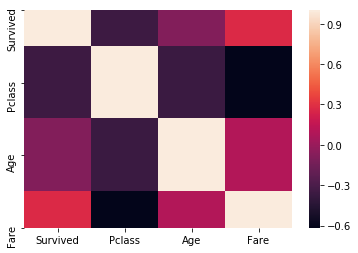

In [200]:
# With seaborn code
sns.heatmap(corr_matrix);

# Matplotlib


In [0]:
# Example data
x=np.linspace(0,5,11)
y=x**2

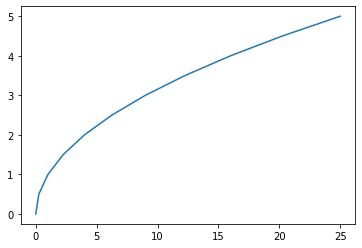

In [202]:
# Plot
plt.plot(y, x);

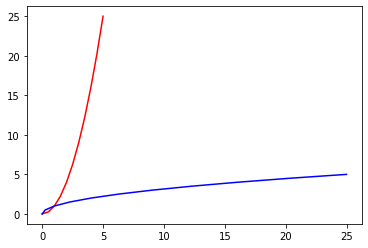

In [203]:
plt.plot(x, y, 'r')
plt.plot(y, x, 'b');

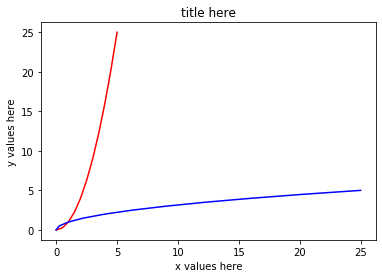

In [204]:
# Add labels
plt.plot(x, y, 'r')
plt.plot(y, x, 'b')
plt.xlabel('x values here')
plt.ylabel('y values here')
plt.title('title here');

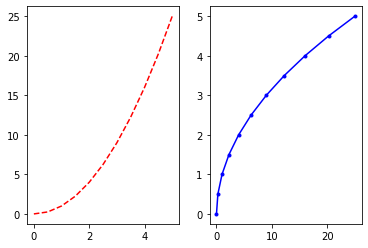

In [205]:
# Mulltiple plot on same canvas
plt.subplot(1, 2, 1)
plt.plot(x, y, "r--")
plt.subplot(1, 2, 2)
plt.plot(y, x, 'b.-');

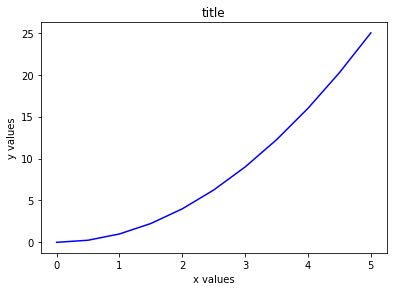

In [206]:
# Create figure
fig = plt.figure()
# Add axes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Labels and title
axes.plot(x, y, 'b')
axes.set_xlabel('x values')
axes.set_ylabel('y values')
axes.set_title('title');

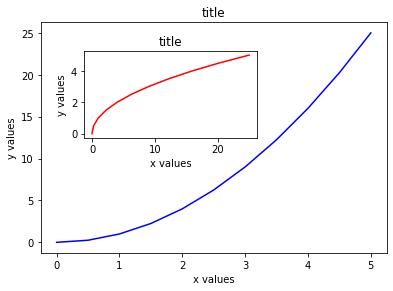

In [207]:
# Create figure
fig = plt.figure()
#Add axes
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])
# Plot of first set of axes
axes1.plot(x, y, 'b')
axes1.set_xlabel('x values')
axes1.set_ylabel('y values')
axes1.set_title('title');

# Plot on second set of axes
axes2.plot(y, x, 'r')
axes2.set_xlabel('x values')
axes2.set_ylabel('y values')
axes2.set_title('title');

Text(0.5, 1.0, 'title here')

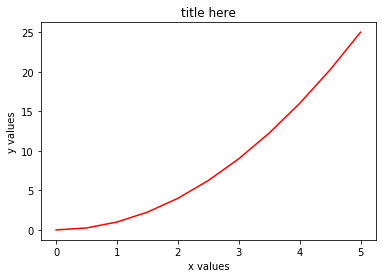

In [208]:
# Subplots
fig, axes = plt.subplots()
# Add stuff
axes.plot(x, y, 'r')
axes.set_xlabel('x values')
axes.set_ylabel('y values')
axes.set_title('title here')

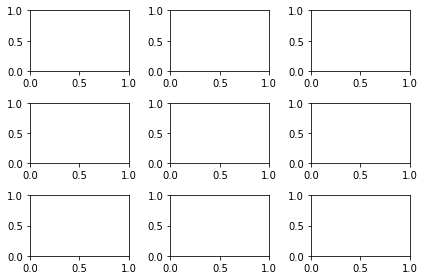

In [209]:
# Empty canvas of 3 x 3 subplots
fig, axes = plt.subplots(3,3)
plt.tight_layout()

In [0]:
# Save figure as png
fig.savefig('myfig.png', dpi=200)

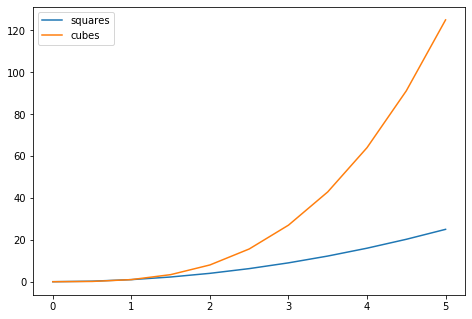

In [211]:
# Add legend
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2, label='squares')
ax.plot(x, x**3, label="cubes")
ax.legend(loc=2);

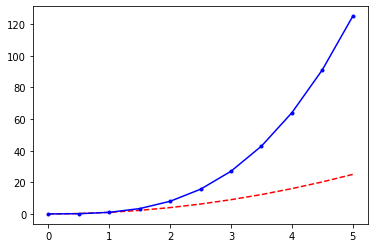

In [212]:
# Matlab like style and color
fig, ax = plt.subplots()
ax.plot(x, x**2, 'r--')
ax.plot(x, x**3, 'b.-');

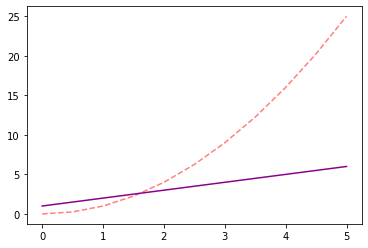

In [213]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'r--', alpha=0.5)
ax.plot(x, x+1, color='#8b008b');

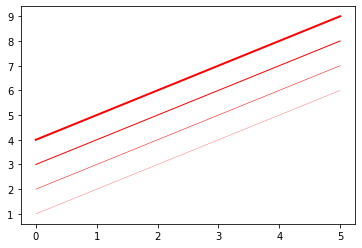

In [214]:
# Line and marker styles

fig, ax = plt.subplots()

# Line width
ax.plot(x, x+1, color='red', linewidth=0.25)
ax.plot(x, x+2, color='red', linewidth=0.5)
ax.plot(x, x+3, color='red', linewidth=1)
ax.plot(x, x+4, color='red', linewidth=2)

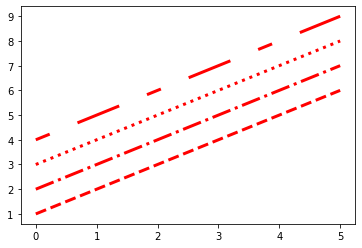

In [215]:
# Line type
fig, ax = plt.subplots()

ax.plot(x, x+1, color='red', linewidth=3, linestyle='--')
ax.plot(x, x+2, color='red', linewidth=3, ls='-.')
ax.plot(x, x+3, color='red', linewidth=3, ls=':')

# Custom dash
line, = ax.plot(x, x+4, color='red', linewidth=3)
line.set_dashes([5, 10, 15, 10])

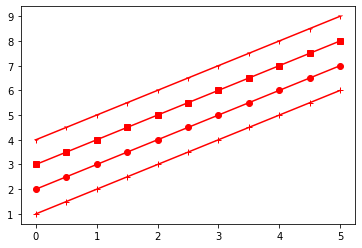

In [216]:
# Marker symbols

fig, ax = plt.subplots()

ax.plot(x, x+1, color='red', marker='+')
ax.plot(x, x+2, color='red', marker='o')
ax.plot(x, x+3, color='red', marker='s')
ax.plot(x, x+4, color='red', marker='1');

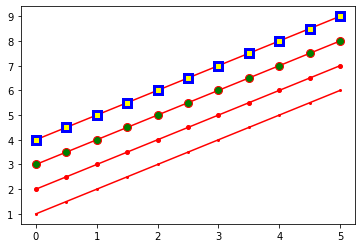

In [217]:
# Marker size and color
fig, ax = plt.subplots()

ax.plot(x, x+1, color='red', marker='o', markersize=2)
ax.plot(x, x+2, color='red', marker='o', markersize=4)
ax.plot(x, x+3, color='red', marker='o', markersize=8, markerfacecolor='green')
ax.plot(x, x+4, color='red', marker='s', markersize=8, markerfacecolor='yellow',
        markeredgewidth=3, markeredgecolor='blue');

Text(0.5, 1.0, 'custom axes range')

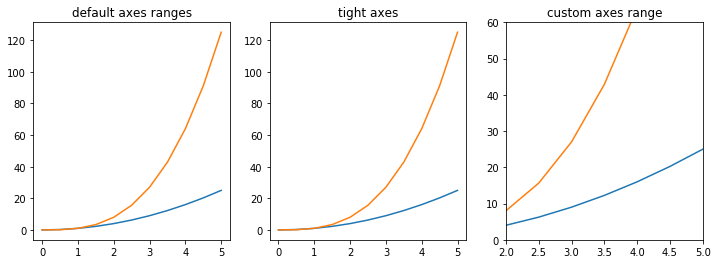

In [218]:
# Plot range
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(x, x**2, x, x**3)
ax[0].set_title('default axes ranges')

ax[1].plot(x, x**2, x, x**3)
ax[1].axis('tight')
ax[1].set_title('tight axes');

ax[2].plot(x, x**2, x, x**3)
ax[2].set_ylim([0,60])
ax[2].set_xlim([2,5])
ax[2].set_title('custom axes range')

# Real world example

In [219]:
# Display example image
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# Create fake data to replicate the blog post figure.
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


NameError: ignored

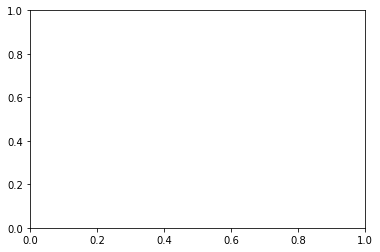

In [222]:
# Annotate with text
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')

# Set bars
fake.plot.bar(width=0.9, color="#ED713A")
ax.set(facecolor='white')

# Set title and subtitle
ax.set_title("'An Inconvenient Sequal: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);


# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

# Real World example 2

In [224]:
# Read data
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [225]:
# Convert timestamps to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].dtypes

dtype('<M8[ns]')

In [226]:
# Set index to timestamp
df.set_index('timestamp', inplace=True)
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Pull out rows from last day
lastday=df['2017-08-29']

In [228]:
# Pull out IMDb users
df = df[df['category']=='IMDb users']
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7


In [390]:
# Grab last line because it should contain the latest info
final = df.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [230]:
# Pull out percents because that's all we need
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [231]:
# Reset index and rename percent column
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


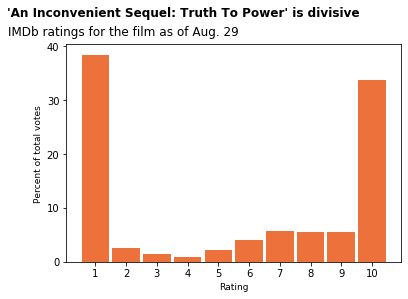

In [232]:
# Plot
fig, ax = plt.subplots()

# Set background color
fig.patch.set(facecolor="white")

# Set bars
ax.bar(x=range(1, 11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

# Recreate another example from fivethirtyeight

In [0]:
# Load data


In [233]:
# I've chosen to recreate a graph from the article "How Baby Boomers Get High"
# found at https://fivethirtyeight.com/features/how-baby-boomers-get-high/

# Display example image
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=575'
example = Image(url=url, width=400)

display(example)

In [434]:
# Load data
high = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')
high.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,0.6,50.0,3.2,3.0,0.6,4.0,8.3,13.0,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,0.4,66.0,1.8,2.0,0.4,3.5,5.9,22.0,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,0.1,280.0,0.6,3.0,0.3,10.0,4.2,12.0,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,0.0,120.0,0.1,2.0,0.0,-,0.6,24.0,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [435]:
high.columns




Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [436]:
# Get columns we need
drugs = ['age','marijuana-use', 'pain-releiver-use', 'tranquilizer-use', 
                'cocaine-use', 'crack-use', 'oxycontin-use', 'stimulant-use', 
                'hallucinogen-use', 'sedative-use', 'inhalant-use', 'meth-use', 
                'heroin-use']
high = high[drugs]
high.tail()



,age,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
12,26-29,20.8,8.3,4.2,3.2,0.4,1.2,2.3,3.2,0.4,0.6,0.6,0.6
13,30-34,16.4,5.9,3.6,2.1,0.5,0.9,1.4,1.8,0.4,0.4,0.4,0.4
14,35-49,10.4,4.2,1.9,1.5,0.5,0.3,0.6,0.6,0.3,0.3,0.2,0.1
15,50-64,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1
16,65+,1.2,0.6,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0


In [0]:
high.set_index('age', inplace=True)


In [440]:
babyboomers = high.loc['50-64']
babyboomers

marijuana-use        7.3
pain-releiver-use    2.5
tranquilizer-use     1.4
cocaine-use          0.9
crack-use            0.4
oxycontin-use        0.4
stimulant-use        0.3
hallucinogen-use     0.3
sedative-use         0.2
inhalant-use         0.2
meth-use             0.2
heroin-use           0.1
Name: 50-64, dtype: float64

In [268]:
display(example)

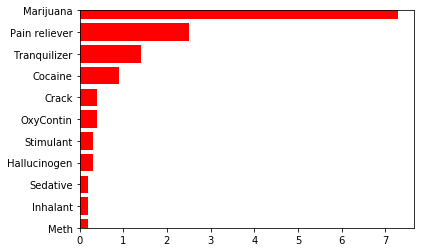

In [466]:
fig, ax = plt.subplots()

# Set background color
fig.patch.set(facecolor="white")

# Plot
y=range(1, 13)
ax.barh(y=y, width=babyboomers, color='red')
ax.invert_yaxis()
ax.set_yticks(range(1, 12))
ax.set_yticklabels(['Marijuana', 'Pain reliever', 'Tranquilizer', 'Cocaine', 
                  'Crack', 'OxyContin', 'Stimulant', 'Hallucinogen', 'Sedative',
                  'Inhalant', 'Meth', 'Heroin']);


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here